# 3:Qubits and State

### Welcome to the Quantum Computing club!

Do you prefer a bit, qubit, or a circuit gate?  
   
Anything you need can be catered for, just give the bartender a shout and he'll bring you a fantastic margarita.  

Ok, I know you are not thirsty, but I insist you try a margarita, at least if you can't read the back of the post you can say you're drunk.

#### *3.1 Qubits*
What is qubit?  

Nice question, before we step into this area, I will have a brief explaining about the conception of ***bit***.  

In classical computation, the basic unit of information is the ***bit***. Every bit can have a states, either 0 or 1. This is also called the ***Binary System***. And our daily computings are all depending on this system. Such as the phone you use, the TV you watch, the music you listen to, all about ***bits***.

But with the development of quantum computer, we have to find another unit which can be the basic unit of quantum information. So, we create the ***quantum bits***, or ***qubits*** for short. Absolutely, there are ***mathematics object***.  

"Wait a minute," you may be a little bit confused, "quantum bit should be a physics object." Well, you are right. Indeed, quantum bit or qubit is a physics object; we will talk about this later, and explain the relation between physics object and abstract mathematics. So, till now, you only need to know that qubit is a mathmatics object.  

Just like the bits, qubits also have a state. Two possible states for a qubit are $|0>$ and $|1>$. Pretty easy, right? The only difference of notation between qubit and bit is $|>$. What is that? This notation called ***Dirac notation***, it is the standard notation in qunatum computing, we will see this notation frequently, so say "hi" to it, be gentle.  

But what is the real difference? The truth is, qubits can be described as the combination of two states, which means a qubit can be other in $|0>$ or $|1>$. So, a qubit can be written as the ***linear combinations*** of states, often called ***superposition***.
$$|\psi> = \alpha|0> + \beta|1>$$  


Absolutely, $\alpha$ and $\beta$ here are complex number. We are trying to avoid complex number, but it seems not work. The state of a qubit is a vector in a two-dimensional complex vector space. The special states $|0>$ and $|1>$ are known as computational basis states, and form an orthonormal basis for this vector space.  

For a qubit, we can have the probability on either $|0>$ or $|1>$ by measuring it. The change during measurement, we called collapse(the wave function). And we can get result 1 with probability $|\alpha|^2$ or 0 with probability $|\beta|^2$.

Naturally, the probability needs to be summed up to one. So we get the formula below:
$$|\alpha|^2 + |\beta|^2 = 1$$

And we can use ***Bloch sphere*** to visualize the state of a single qubit, which is also a wonderful testbed of quantum computing and quantum information.

And in mathematics, $|0> = \begin{bmatrix}
{1}\\
{0}\\
\end{bmatrix}$, $|1> = \begin{bmatrix}{0}\\{1}\\\end{bmatrix}$

Statevector([ 0.09755473+0.17617512j, -0.25939441-0.94454219j],
            dims=(2,))


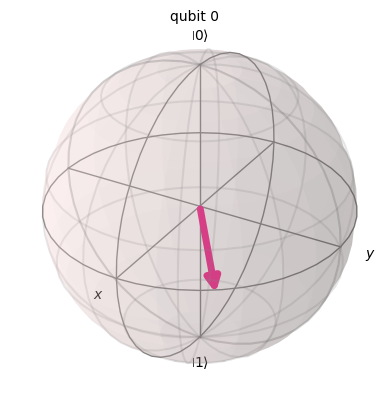

In [1]:
import qiskit.visualization as qv
import qiskit.quantum_info as qq
import numpy as np
state = qq.random_statevector(2) #create a random single qubit
print(state)
qv.plot_bloch_multivector(state) #drew the Bloch sphere

Hold on, Why this ***Bloch sphere*** is a ball? This is another mathematics magic.  

Due to $|\alpha|^2 + |\beta|^2 = 1$, we can use ***Euler's fomula*** to change the style. ***Euler's formula*** can change any complex style to exponential style by using *$e^{i\theta} = cos(\theta) + isin(\theta)$*.

For $|\psi> = \alpha|0> + \beta|1>$, let $|\alpha| = cos({\theta\over2})e^{i\phi_1}$, $|\beta| = cos({\theta\over2})e^{i\phi_2}$  

Next, we introduce a global phase $e^{i\gamma}$ which multiplies the entire state vector and does not change the physical properties of the state.
$$|\psi> = e^{i\gamma}(cos({\theta\over2})e^{i\phi_1}|0> + cos({\theta\over2})e^{i\phi_2}|1>)$$  

To simplify the expression, we can merge the phases $\phi_1$ and $\phi_2$ since they are arbitrary. Typically, we will choose $\phi_1$ = 0 so that we can combine the phases of a and b into a single phase $\phi$.

Then we get $$|\psi> = e^{i\gamma}(cos({\theta\over2})|0> + cos({\theta\over2})e^{i\phi}|1>)$$. Because $e^{i\gamma}$ is a global phase, it won't change anything, so we can also write this formula like $$|\psi> = (cos({\theta\over2})|0> + cos({\theta\over2})e^{i\phi}|1>)$$.  

The numbers $\theta$ and $\phi$ define a point on the unit three-dimensional sphere, as shown in ***Bloch sphere***.

So this is the reason why ***Bloch spheer*** is a ball.

#### *3.2 Multi Qubits*

I introduce single qubit to you in section 2, and we have to move on to ***Multi Qubits***.  

Suppose we have two qubits; then there will be four states, 00, 01, 10, 11. So, if you have $n$ qubits, you will get a state with $2^n$ information. Correspondingly, a two qubits system has four computational basis states denoted $|00>$, $|01>$, $|10>$, $|11>$. So we can get the state vector:
$$|\psi> = a_{00}|00> + a_{01}|01> + a_{10}|10> + a_{11}|11>$$  

By the way, $|00>$ means $|0>$ do tensor product with $|0>$, and so on.

Well down, so I leave a question for you, what about a three qubits system?

In [2]:
state1 = qq.random_statevector(2**2)
print(state1)

Statevector([ 0.39073603+0.02269198j, -0.29989572+0.24668657j,
             -0.01179205+0.78151915j, -0.17060419-0.23664679j],
            dims=(2, 2))


##### *3.2.1 Probability*

In section 3.1 we indicate that you can get a result 0 with probability $|\alpha|^2$ and 1 with probability $|\beta|^2$. But how does this work in multi-qubits system? If we want to measure the probability of $|00>$, $|01>$, $|10>$, $|11>$, this is the same as single qubit. But we will go deeper in this section, how do we get the probability of the first qubit becoming 0 in a two qubits system?  

You may already have the answer. Correct, in a two qubits system, the probability for the first qubit goes to zero is $|a_{00}|^2 + |a_{01}|^2$. 

So what about four qubits systems? 

An important two qubits state is the ***Bell state*** or ***EPR pair***.
$${|00> + |11>\over\sqrt{2}}$$

The amazing thing is that you can get 0 with probs 1/2 and 1 with probs 1/2. ***Bell state*** is very useful in quantum computation and information due to this reason.

#### 3.3 *Gates*
There are lots of changes in quantum computing. But how?
You may say, "Do this and do that, you can get the final state." That is right! So Let us figure out what is "do this" and "do that."
 
##### 3.3.1 *Single Qubits Gate*
Let us start with the easy one. One problem, you want to change $|0>$ to $|1>$, what should you do? Of course, you need some component to make this change. You may have some ideas, right, you need a matrix.

So ***Gate*** actually are the ***matrix***, thought those matrix, you can get the state you want.

The first one is ***NOT*** Gate, noted as ***X***.

In [3]:
X = np.array([[1,0],[0,1]])
print(X)

[[1 0]
 [0 1]]


Remember what $|0>$ and $|1>$ stands for? Yes, the vector! 

Then you do matrix multiplication of $|0>$ and ***X***, and you get $|1>$. Same as $|1>$.

So we call the ***NOT*** gate as a flip gate.